# Random Forests Exercise

### Random Forests with sklearn

In this sprint we will be practicing using the `scikit-learn` implementation of random forests. For this exercise, we'll be attempting to classify whether a customer churns or not given a set of inputs. We can use the Random Forest to get more insight into the churn data. Only about 15% of the data points are positive for churn. 

The documentation for sklearn's random forest can be found here: [RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

You might find the documentation for these sklearn functions helpful: [precision_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html), [recall_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) and [confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

Each row represents a subscribing telephone customer. Each column contains customer attributes such as phone number, call minutes used during different times of day, charges incurred for services, lifetime account duration, and whether or not the customer is still a customer.

1. Load the `data/churn.csv` file into a pandas DataFrame.

In [139]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.special import comb

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import log_loss, make_scorer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.datasets import load_breast_cancer, load_iris

data = pd.read_csv('data/churn.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State             3333 non-null object
Account Length    3333 non-null int64
Area Code         3333 non-null int64
Phone             3333 non-null object
Int'l Plan        3333 non-null object
VMail Plan        3333 non-null object
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Mins          3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
CustServ Calls    3333 non-null int64
Churn?            3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


In [52]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


1. Convert the "no", "yes" values to booleans (True/False) as well as any booleans that are stored as strings.

In [53]:
obj_cols =data.select_dtypes(include ='object').columns
for col in obj_cols:
    print (data[col].unique())
print(obj_cols)

['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
['382-4657' '371-7191' '358-1921' ... '328-8230' '364-6381' '400-4344']
['no' 'yes']
['yes' 'no']
['False.' 'True.']
Index(['State', 'Phone', 'Int'l Plan', 'VMail Plan', 'Churn?'], dtype='object')


In [54]:
data["Int'l Plan"] = data["Int'l Plan"].apply(lambda x: True if x =='yes' else False)
data['VMail Plan'] = data['VMail Plan'].apply(lambda x: True if x =='yes' else False)
data['Churn?'] = data['Churn?'].apply(lambda x: True if x =='True.' else False)

In [55]:
data.head(5)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,False,True,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,False,True,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,False,False,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,True,False,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,True,False,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [56]:
for col in data.columns:
    print(f'{col}:',len(data[col].unique()), data[col].unique())
    

State: 51 ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
Account Length: 212 [128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  42 189 156 

1. Remove the features which aren't boolean or meaningfully numerical.

In [58]:
not_interested_cols = ['Area Code', 'Phone', 'Account Length','State']
data.drop(columns = not_interested_cols, inplace =True)
data.head()

,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [87]:
data_columns =data.columns.drop('Churn?')
data_columns

Index(['Int'l Plan', 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls'],
      dtype='object')

1. Make a numpy array called `y` containing the churn values.

In [59]:
y =np.array(data['Churn?'].values)
y.shape

(3333,)

1. Make a 2-dimensional numpy array containing the feature data (everything except the labels) called `X`.

In [60]:
X = np.array(data.drop('Churn?', axis = 1))
X.shape

(3333, 16)

1. Use sklearn's `train_test_split` to split into train and test set.

In [61]:
X_train, X_test,y_train, y_test = train_test_split(X,y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(2499, 16) (834, 16) (2499,) (834,)


1. Use sklearn's `RandomForestClassifier` to build a model of your data. Start by using the defaults for all of the parameters.

In [62]:
rfc = RandomForestClassifier()

In [63]:
rfc.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

In [64]:
X_train

array([[False, False, 0, ..., 14, 2.65, 2],
       [False, False, 0, ..., 2, 3.08, 0],
       [False, True, 31, ..., 4, 2.75, 1],
       ...,
       [False, False, 0, ..., 6, 3.08, 2],
       [False, True, 43, ..., 4, 3.0, 2],
       [False, True, 23, ..., 2, 2.65, 0]], dtype=object)

1. What is the accuracy score on the test data?

In [67]:
rfc.fit(X_train, y_train)
y_pre = rfc.predict(X_test)

In [68]:
log_loss_1 = log_loss(y_test, rfc.predict_proba(X_test)[:,1])
score_1 = rfc.score(X_test, y_test)

print(f'first_log_loss: {log_loss_1}')
print(f'first_accuracy: {score_1}')

first_log_loss: 0.4859137688780492
first_accuracy: 0.9520383693045563


1. Draw a [confusion matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) for the results.

In [72]:
from sklearn.metrics import confusion_matrix
result_1 = confusion_matrix(y_test, y_pre)
result_1

array([[707,   9],
       [ 31,  87]])

In [73]:
tn = result_1[0][0]
fp = result_1[0][1]confusion_matrix(y_test, y_pre)
fn = result_1[1][0]
tp = result_1[1][1]
tn,fp, fn, tp

(707, 9, 31, 87)

1. What are the precision and recall?

In [80]:
precision = tp /(tp+fp)
recall = tp/(tp+fn)
precision, recall

(0.9186046511627907, 0.6694915254237288)

1. Build the `RandomForestClassifier` again setting the out of bag parameter -- `oob_score` to be `True`. Compare the out of bag score of the *training* set with the accuracy on the *test* set. How close are they?

    It might complain that you are using too few trees to reliably use out of bag score. You can still see the results, but try increasing the number of trees as well to remove the warning.

In [78]:
rf_1 = RandomForestClassifier(oob_score = True)
rf_1.fit(X_train, y_train)
y_pre = rf_1.predict(X_test)

log_loss_1 = log_loss(y_test, rf_1.predict_proba(X_test)[:,1])
score_1 = rf_1.score(X_test, y_test)

result2 = confusion_matrix(y_test, y_pre)
tn = result2[0][0]
fp = result2[0][1]
fn = result2[1][0]
tp = result2[1][1]

precision = tp /(tp+fp)
recall = tp/(tp+fn)
precision, recall

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


(0.9186046511627907, 0.6694915254237288)

1. Say you would like to give advice for what to focus on to prevent churn. You would like to be able to say what specifics about a user you should focus on changing in order to make them not churn. Use sklearn's model to get the feature importances. What are the top five features? What could you do to potentially limit churn?

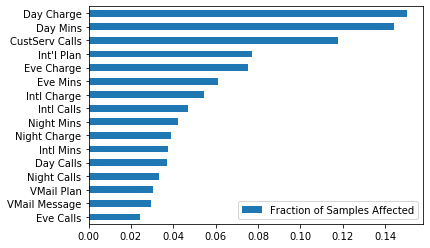

In [93]:
feat_scores = pd.DataFrame({'Fraction of Samples Affected':rf_1.feature_importances_}, index = data_columns)
feat_scores.sort_values(by = 'Fraction of Samples Affected').plot(kind='barh');

In [94]:
from collections import defaultdict
defaultdict(list)

defaultdict(list, {})

1. Try modifying the number of trees. The default is 100 trees. Try 5-10 different values for the number of trees and make a graph of the number of trees versus the accuracy score. Is there a point where creating more trees doesn't seem to help anymore?

    If you get an inconsistent graph, try creating a few random forests for each number and averaging them. This should smooth out your graph.

In [128]:
nums_trees = np.arange(5,1000 , step= 100)

acc_scores = []
for tree in nums_trees:
    rf_1 = RandomForestClassifier(oob_score = True, n_estimators=tree,random_state=123)
    rf_1.fit(X_train, y_train)
    y_pre = rf_1.predict(X_test)

    log_loss_1 = log_loss(y_test, rf_1.predict_proba(X_test)[:,1])
    score_1 = rf_1.score(X_test, y_test)
    acc_scores.append(score_1)

acc_scores

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[0.9496402877697842,
 0.9568345323741008,
 0.9568345323741008,
 0.9556354916067147,
 0.9568345323741008,
 0.9556354916067147,
 0.9568345323741008,
 0.9544364508393285,
 0.9568345323741008,
 0.9556354916067147]

In [127]:
np.arange(5,1000 ,step= 100)

array([  5, 105, 205, 305, 405, 505, 605, 705, 805, 905])

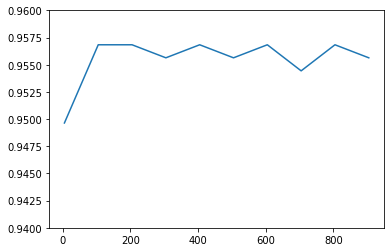

In [133]:
plt.plot(np.arange(5,1000 ,step= 100), acc_scores)
plt.ylim((0.94,0.96));

In [101]:
nums_trees = np.arange(5,200 , step= 10)
nums_trees

acc_scores_1 = []
for tree in nums_tress:
    rf_1 = RandomForestClassifier(oob_score = True, n_estimators=tree)
    rf_1.fit(X_train, y_train)
    y_pre = rf_1.predict(X_test)

    log_loss_1 = log_loss(y_test, rf_1.predict_proba(X_test)[:,1])
    score_1 = rf_1.score(X_test, y_test)
    acc_scores_1.append(score_1)

acc_scores_1

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[0.9412470023980816,
 0.9628297362110312,
 0.9592326139088729,
 0.9592326139088729,
 0.9628297362110312,
 0.9520383693045563,
 0.9532374100719424,
 0.9592326139088729,
 0.9556354916067147,
 0.9556354916067147,
 0.9568345323741008,
 0.9532374100719424,
 0.960431654676259,
 0.9556354916067147,
 0.9568345323741008,
 0.9556354916067147,
 0.9580335731414868,
 0.9568345323741008,
 0.9568345323741008,
 0.9556354916067147]

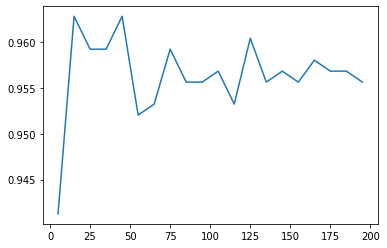

In [102]:
plt.plot(nums_trees, acc_scores_1)

1. Try modifying the max features parameter. The default is using `sqrt(total # of features)`. Try all the different possible values (1 to the total number of features) and make a graph of the number of features versus the accuracy score. Is there a point where using additional features doesn't seem to help?

In [112]:
int(len(data_columns) **0.5)

4

In [118]:
acc_scores_2 = []
for i in range(1,len(data_columns)):
    rf_2 = RandomForestClassifier(n_estimators = 100
                                  , max_features = i+1)
    rf_2.fit(X_train, y_train)
    y_pre = rf_2.predict(X_test)

    log_loss_2 = log_loss(y_test, rf_1.predict_proba(X_test)[:,1])
    score_2 = rf_2.score(X_test, y_test)
    acc_scores_2.append(score_2)

acc_scores_2

[0.9448441247002398,
 0.9520383693045563,
 0.9568345323741008,
 0.9592326139088729,
 0.9616306954436451,
 0.9580335731414868,
 0.9580335731414868,
 0.9568345323741008,
 0.9592326139088729,
 0.960431654676259,
 0.9592326139088729,
 0.9616306954436451,
 0.9544364508393285,
 0.9580335731414868,
 0.9568345323741008]

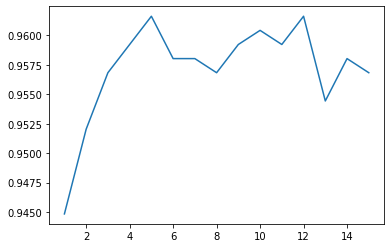

In [121]:
plt.plot(range(1,len(data_columns)),acc_scores_2 )

1. Run all the other classifiers that we have learned so far in class (logistic regression, decision tree, k nearest neighbors) using sklearn's default parameters for all of them. You can use the optimal parameters you found above for Random Forest. If you have time, you can tune the other models as well. Which gets the highest accuracy? Precision? Recall?

In [144]:
knn = KNeighborsClassifier()
logistic = LogisticRegression()
dc =DecisionTreeClassifier()

knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)

logistic.fit(X_train, y_train)
logistic_predict = logistic.predict(X_test)

dc.fit(X_train, y_train)
dc_predict = dc.predict(X_test)

knn_cm = confusion_matrix(knn_predict, y_test)
log_cm = confusion_matrix(logistic_predict, y_test)
dc_cm = confusion_matrix(dc_predict, y_test)

scores = []
for i,cm in enumerate([knn_cm, log_cm, dc_cm]):
    model_list = ['knn','logistic','decisiontree']
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]

    precision = tp /(tp+fp)
    recall = tp/(tp+fn)
    scores.append([model_list[i],precision, recall])
    
scores

    

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[['knn', 0.3474576271186441, 0.7735849056603774],
 ['logistic', 0.1440677966101695, 0.6296296296296297],
 ['decisiontree', 0.7542372881355932, 0.6357142857142857]]

1. Use the included `plot_roc` function to visualize the roc curve of each model. Note that you can pass parameters like this:

        plot_roc(X, y, RandomForestClassifier, n_estimators=20)

    Which model would you choose if I'm okay with a recall of 0.2?

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: F

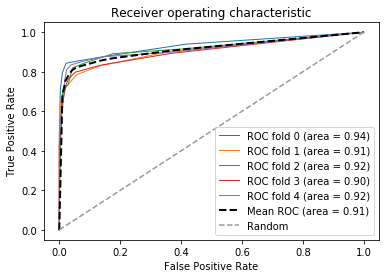

In [149]:
from src.roc import plot_roc
plot_roc(X,y, RandomForestClassifier, 'roc')

    
1. Plot the feature importances as described in the lecture notes. Recall that `RandomForestClassifier` is a ensemble of many trees, and each individual tree will attribute different importances to different features. Extend the feature importance code to find the standard deviation of the importance for each feature across all trees. Add error bars to your chart, where the width of the bars is the equal to the standard deviation for that feature.